# Importing Dataset & Libraries

In [351]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("validation.csv")
test_df = pd.read_csv("test.csv")
combined_df = pd.concat([train_df, val_df, test_df], axis=0, ignore_index=True)

print(combined_df.shape)

(7043, 52)


In [352]:
combined_df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1


# Analysing Data

In [354]:
combined_df.columns.values

array(['Age', 'Avg Monthly GB Download',
       'Avg Monthly Long Distance Charges', 'Churn Category',
       'Churn Reason', 'Churn Score', 'City', 'CLTV', 'Contract',
       'Country', 'Customer ID', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service',
       'Internet Type', 'Lat Long', 'Latitude', 'Longitude', 'Married',
       'Monthly Charge', 'Multiple Lines', 'Number of Dependents',
       'Number of Referrals', 'Offer', 'Online Backup', 'Online Security',
       'Paperless Billing', 'Partner', 'Payment Method', 'Phone Service',
       'Population', 'Premium Tech Support', 'Quarter',
       'Referred a Friend', 'Satisfaction Score', 'Senior Citizen',
       'State', 'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Under 30', 'Unlimited Data', 'Zip Code', 'Churn'], dtype=object)

In [355]:
combined_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Avg Monthly GB Download            7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Churn Category                     1869 non-null   object 
 4   Churn Reason                       1869 non-null   object 
 5   Churn Score                        7043 non-null   int64  
 6   City                               7043 non-null   object 
 7   CLTV                               7043 non-null   int64  
 8   Contract                           7043 non-null   object 
 9   Country                            7043 non-null   object 
 10  Customer ID                        7043 non-null   object 
 11  Customer Status                    7043 non-null   objec

# Data Cleaning and Processing

In [357]:
# dropping irrelevant columns
drop_cols = [
    "Churn Category",
    "Churn Reason",
    "Churn Score",
    "CLTV",
    "Customer ID",
    "Customer Status",
    "Population",
    "Lat Long",
    "Latitude",
    "Longitude",
    "Number of Dependents",
    "Number of Referrals",
    "Zip Code",
    "Country",
    "City",
    "State",
    "Quarter",
    "Satisfaction Score",
    "Total Charges",
    "Total Extra Data Charges",
    "Total Long Distance Charges",
    "Total Revenue",
    "Total Refunds",
    "Under 30",
]

train_df = train_df.drop(columns=drop_cols)
val_df   = val_df.drop(columns=drop_cols)
test_df  = test_df.drop(columns=drop_cols)
combined_df  = combined_df.drop(columns=drop_cols)

In [358]:
combined_df.shape

(7043, 28)

In [359]:
# checking null values
combined_df.isnull().sum()

Age                                     0
Avg Monthly GB Download                 0
Avg Monthly Long Distance Charges       0
Contract                                0
Dependents                              0
Device Protection Plan                  0
Gender                                  0
Internet Service                        0
Internet Type                        1526
Married                                 0
Monthly Charge                          0
Multiple Lines                          0
Offer                                3877
Online Backup                           0
Online Security                         0
Paperless Billing                       0
Partner                                 0
Payment Method                          0
Phone Service                           0
Premium Tech Support                    0
Referred a Friend                       0
Senior Citizen                          0
Streaming Movies                        0
Streaming Music                   

In [360]:
# Filling null vlaues
train_df["Internet Type"] = train_df["Internet Type"].fillna("No Internet")
val_df["Internet Type"]   = val_df["Internet Type"].fillna("No Internet")
test_df["Internet Type"]  = test_df["Internet Type"].fillna("No Internet")
combined_df["Internet Type"]  = combined_df["Internet Type"].fillna("No Internet")


train_df["Offer"] = train_df["Offer"].fillna("No Offer")  
val_df["Offer"] = val_df["Offer"].fillna("No Offer")
test_df["Offer"] = test_df["Offer"].fillna("No Offer")
combined_df["Offer"] = combined_df["Offer"].fillna("No Offer")

In [361]:
# after filling the null values
combined_df.isnull().sum()

Age                                  0
Avg Monthly GB Download              0
Avg Monthly Long Distance Charges    0
Contract                             0
Dependents                           0
Device Protection Plan               0
Gender                               0
Internet Service                     0
Internet Type                        0
Married                              0
Monthly Charge                       0
Multiple Lines                       0
Offer                                0
Online Backup                        0
Online Security                      0
Paperless Billing                    0
Partner                              0
Payment Method                       0
Phone Service                        0
Premium Tech Support                 0
Referred a Friend                    0
Senior Citizen                       0
Streaming Movies                     0
Streaming Music                      0
Streaming TV                         0
Tenure in Months         

In [362]:
# checking the data types of the columns
combined_df.dtypes

Age                                    int64
Avg Monthly GB Download                int64
Avg Monthly Long Distance Charges    float64
Contract                              object
Dependents                             int64
Device Protection Plan                 int64
Gender                                object
Internet Service                       int64
Internet Type                         object
Married                                int64
Monthly Charge                       float64
Multiple Lines                         int64
Offer                                 object
Online Backup                          int64
Online Security                        int64
Paperless Billing                      int64
Partner                                int64
Payment Method                        object
Phone Service                          int64
Premium Tech Support                   int64
Referred a Friend                      int64
Senior Citizen                         int64
Streaming 

In [363]:
# Converting categorical values to numerical values
combined_df = pd.get_dummies(combined_df, columns=['Contract', 'Gender', 'Internet Type', 'Payment Method', 'Offer'], drop_first = True)
combined_df.dtypes

Age                                    int64
Avg Monthly GB Download                int64
Avg Monthly Long Distance Charges    float64
Dependents                             int64
Device Protection Plan                 int64
Internet Service                       int64
Married                                int64
Monthly Charge                       float64
Multiple Lines                         int64
Online Backup                          int64
Online Security                        int64
Paperless Billing                      int64
Partner                                int64
Phone Service                          int64
Premium Tech Support                   int64
Referred a Friend                      int64
Senior Citizen                         int64
Streaming Movies                       int64
Streaming Music                        int64
Streaming TV                           int64
Tenure in Months                       int64
Unlimited Data                         int64
Churn     

# Train Test Splitting

In [365]:
x = combined_df.drop(['Churn'], axis=1)
y = combined_df['Churn']

scaler_x=StandardScaler()
X=scaler_x.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
y_train.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

# Model Building

## Decision Tree Classification

In [368]:
model_dt = DecisionTreeClassifier(
    max_depth=8,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42,
)

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=10, random_state=42)

In [369]:
y_pred = model_dt.predict(X_test)
y_pred_train = model_dt.predict(X_train)

### Model Evaluation

In [371]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_prob = model_dt.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
  
print("Cross-Entropy (Log Loss):", log_loss(y_test, y_prob))  

Accuracy: 0.7778566359119943
Training Accuracy: 0.7962371317003905

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.75      0.83      1035
           1       0.55      0.85      0.67       374

    accuracy                           0.78      1409
   macro avg       0.74      0.80      0.75      1409
weighted avg       0.83      0.78      0.79      1409

ROC-AUC Score: 0.863108062724431
Cross-Entropy (Log Loss): 0.6629718276146281


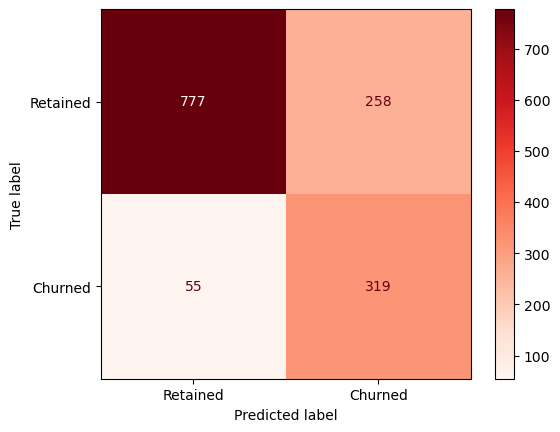

In [372]:
cm = confusion_matrix(y_test, y_pred)

matrix = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Retained", "Churned"]
)

matrix.plot(cmap="Reds")
plt.show()

## Random Forest Classifier

In [374]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=10,
    class_weight="balanced",
    bootstrap=True,
    oob_score=True,
    random_state=42
)

model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, n_estimators=300, oob_score=True,
                       random_state=42)

In [375]:
y_pred = model_rf.predict(X_test)
y_pred_train = model_rf.predict(X_train)

### Model Evaluation

In [377]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_prob = model_rf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

print("Cross-Entropy (Log Loss):", log_loss(y_test, y_prob))  

Accuracy: 0.8126330731014905
Training Accuracy: 0.8367057152999645

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      1035
           1       0.61      0.81      0.70       374

    accuracy                           0.81      1409
   macro avg       0.77      0.81      0.78      1409
weighted avg       0.84      0.81      0.82      1409

ROC-AUC Score: 0.8919837763827533
Cross-Entropy (Log Loss): 0.41545213022524247


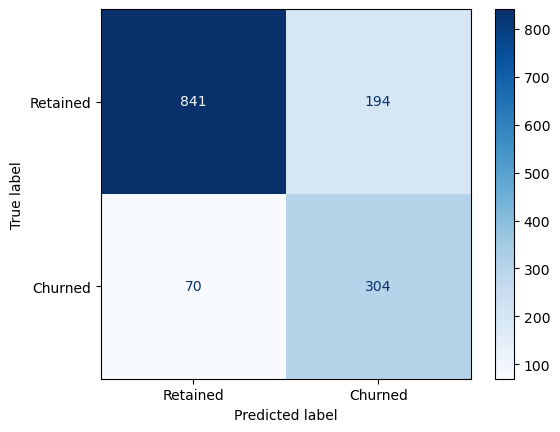

In [378]:
cm = confusion_matrix(y_test, y_pred)

matrix = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Retained", "Churned"]
)

matrix.plot(cmap="Blues")
plt.show()

## XG Boosting

In [380]:
model_xgb = XGBClassifier(
    n_estimators=300,
    max_depth=2,
    scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1]),
    random_state=42
)

model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [381]:
y_pred = model_xgb.predict(X_test)
y_pred_train = model_xgb.predict(X_train)

### Model Evaluation

In [383]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

y_prob = model_xgb.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

print("Cross-Entropy (Log Loss):", log_loss(y_test, y_prob))  

Accuracy: 0.8119233498935415
Training Accuracy: 0.8407880724174653

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.86      1035
           1       0.61      0.80      0.69       374

    accuracy                           0.81      1409
   macro avg       0.76      0.81      0.78      1409
weighted avg       0.84      0.81      0.82      1409

ROC-AUC Score: 0.8862796765610066
Cross-Entropy (Log Loss): 0.4099311860225734


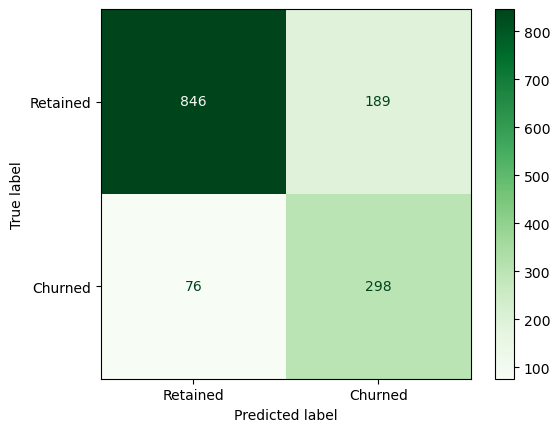

In [384]:
cm = confusion_matrix(y_test, y_pred)

matrix = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Retained", "Churned"]
)

matrix.plot(cmap="Greens")

plt.show()

<Figure size 800x500 with 0 Axes>

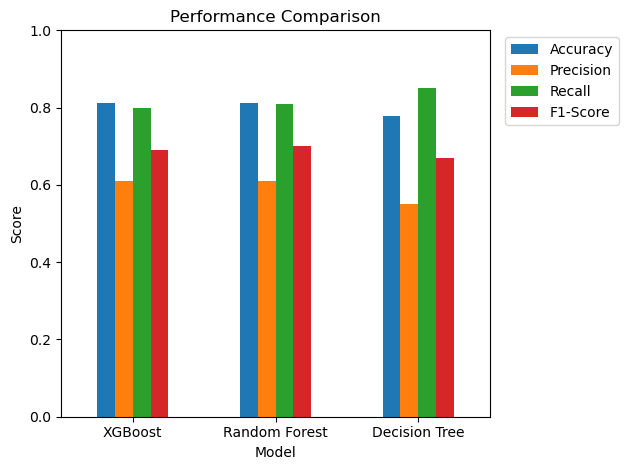

In [385]:
data = {
    "Model": ["XGBoost", "Random Forest", "Decision Tree"],
    "Accuracy": [0.8119, 0.8126, 0.7779],   
    "Precision": [0.61, 0.61, 0.55],        
    "Recall": [0.80, 0.81, 0.85],           
    "F1-Score": [0.69, 0.70, 0.67]          
}

df = pd.DataFrame(data)
df.set_index("Model", inplace=True)

plt.figure(figsize=(8,5))
ax = df.plot(kind="bar")

plt.title("Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)

plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")

plt.tight_layout()
plt.show()

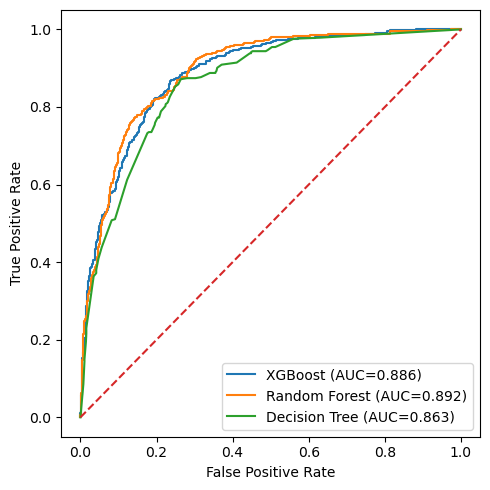

In [386]:
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]   
y_prob_rf  = model_rf.predict_proba(X_test)[:, 1]   
y_prob_dt  = model_dt.predict_proba(X_test)[:, 1]    

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb) 
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_prob_rf) 
fpr_dt,  tpr_dt,  _ = roc_curve(y_test, y_prob_dt) 

auc_xgb = roc_auc_score(y_test, y_prob_xgb)  
auc_rf  = roc_auc_score(y_test, y_prob_rf) 
auc_dt  = roc_auc_score(y_test, y_prob_dt)  


plt.figure(figsize=(5,5))

plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")  
plt.plot(fpr_rf,  tpr_rf,  label=f"Random Forest (AUC={auc_rf:.3f})")  
plt.plot(fpr_dt,  tpr_dt,  label=f"Decision Tree (AUC={auc_dt:.3f})")  
plt.plot([0,1],[0,1], linestyle="--")  

plt.xlabel("False Positive Rate")  
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()    
plt.show()

In [387]:
print(type(X_train))
print(X_train.shape)


<class 'numpy.ndarray'>
(5634, 35)


In [388]:
import tensorflow as tf

model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation="relu", input_shape=(35,)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_nn.fit(
    X_train, y_train,
    epochs=20,
)

# Prediction
y_prob_nn = model_nn.predict(X_test)
y_pred_nn = (y_prob_nn >= 0.5).astype(int)

print(classification_report(y_test, y_pred_nn))
print("Neural Network AUC:", roc_auc_score(y_test, y_prob_nn))

print("Cross-Entropy (Log Loss):", log_loss(y_test, y_prob_nn))  

Epoch 1/20


C:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7387 - loss: 0.5022
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8151 - loss: 0.4028
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8282 - loss: 0.3816
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8356 - loss: 0.3694
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8401 - loss: 0.3605
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.3538
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8440 - loss: 0.3485
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.3425
Epoch 9/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8479 - loss: 0.3372
Epoch 10/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.3343
Epoch 11/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.3300
Epoch 12/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

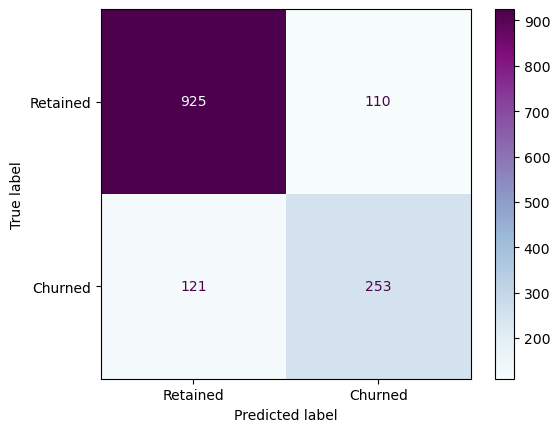

In [389]:
cm = confusion_matrix(y_test, y_pred_nn)

matrix = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Retained", "Churned"]
)

matrix.plot(cmap="BuPu")

plt.show()